### SPLITING DATA FOR TRAINING AND TESTING

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
df = pd.read_csv('cleaned_car_data.csv')

df_train = pd.DataFrame()
df_test = pd.DataFrame()

For each combination of model and manufacturer, split the data into training (80%) and testing (20%) sets:

In [34]:
models = df['Model'].unique()
manufacturers = df['Manufacturer'].unique()

for model in models:
    for manufacturer in manufacturers:
        model_manufacturer_pairs = df[(df['Manufacturer'] == manufacturer) & (df['Model'] == model)]
        if(len(model_manufacturer_pairs) != 0):
            train_pairs, test_pairs = train_test_split(model_manufacturer_pairs, test_size=0.2, random_state=12)

            df_train = pd.concat([df_train, train_pairs])
            df_test = pd.concat([df_test, test_pairs])

print(df_train.shape, df_test.shape)

(9928, 391) (2647, 391)


Drop the "Manufacturer", "Model", and "Fuel Type" columns from both training and testing sets:

In [35]:
df_train = df_train.drop(columns=["Manufacturer", "Model", "Fuel Type"])
df_test = df_test.drop(columns=["Manufacturer", "Model", "Fuel Type"])

print(df_train.shape, df_test.shape)

(9928, 388) (2647, 388)


Remove rows with missing values:

In [36]:
df_train = df_train.dropna()
df_test = df_test.dropna()

### DATA SCALING (Min-Max Scaler)

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Select columns with numeric data types.
numeric_non_bool = df_train.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

# Computes the minimum and maximum values for each numeric column in the training data
scaler.fit(df_train[numeric_non_bool])

# Apply the scaler to both training and testing data.
df_train[numeric_non_bool] = scaler.transform(df_train[numeric_non_bool])
df_test[numeric_non_bool] = scaler.transform(df_test[numeric_non_bool])

In [38]:
print("Transformed df_train:\n")
print(df_train.head())

Transformed df_train:

             Price  Transmission      Year  Motor Strength (KW)  Mileage  \
401   9.450004e-07           0.0  0.600000             0.021505    0.150   
7106  8.550004e-06           0.0  0.814286             0.055556    0.115   
321   9.000004e-07           0.0  0.628571             0.014337    0.300   
5500  7.470003e-06           0.0  0.842857             0.055556    0.182   
3643  5.850003e-06           0.0  0.800000             0.075269    0.188   

      Engine Capacity  Model_100  Model_106  Model_107  Model_116  ...  \
401          0.137931      False      False      False      False  ...   
7106         0.103448      False      False      False      False  ...   
321          0.068966      False      False      False      False  ...   
5500         0.103448      False      False      False      False  ...   
3643         0.137931      False      False      False      False  ...   

      Manufacturer_Suzuki  Manufacturer_Toyota  Manufacturer_Volkswagen  \


In [39]:
print("Transformed df_test:\n")
print(df_test.head())

Transformed df_test:

             Price  Transmission      Year  Motor Strength (KW)  Mileage  \
4933  7.020003e-06           0.0  0.814286             0.068100    0.203   
274   8.100004e-07           0.0  0.657143             0.001792    0.175   
4495  6.705003e-06           0.0  0.814286             0.041219    0.262   
3721  6.030003e-06           0.0  0.771429             0.048387    0.118   
3483  5.805003e-06           0.0  0.800000             0.068100    0.250   

      Engine Capacity  Model_100  Model_106  Model_107  Model_116  ...  \
4933         0.120690      False      False      False      False  ...   
274          0.103448      False      False      False      False  ...   
4495         0.120690      False      False      False      False  ...   
3721         0.103448      False      False      False      False  ...   
3483         0.120690      False      False      False      False  ...   

      Manufacturer_Suzuki  Manufacturer_Toyota  Manufacturer_Volkswagen  \
4

### NEURAL NETWORK

Split the data into features X and target variable y:

In [40]:
from keras import models
from keras import layers
from keras import optimizers

X_train = df_train.drop(columns=['Price'])  
y_train = df_train['Price']

X_test = df_test.drop(columns=['Price'])
y_test = df_test['Price']

print(X_train.shape, X_test.shape)

(9928, 387) (2647, 387)


Define a sequential neural network with two hidden layers and one output layer:

In [41]:
model = models.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu')) # hidden layer
model.add(layers.Dense(32, activation='relu')) # hidden layer
model.add(layers.Dense(1))  # output layer

Compile the model using Adam optimizer and mean absolute error loss function:

In [42]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae')

Train the model with a validation split, for 10 epochs:

In [43]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0142 - val_loss: 0.0157
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - val_loss: 0.0137
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0104
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0064
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0059
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0046
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 9/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 10/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0511e-04 - val_loss: 0.0026
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


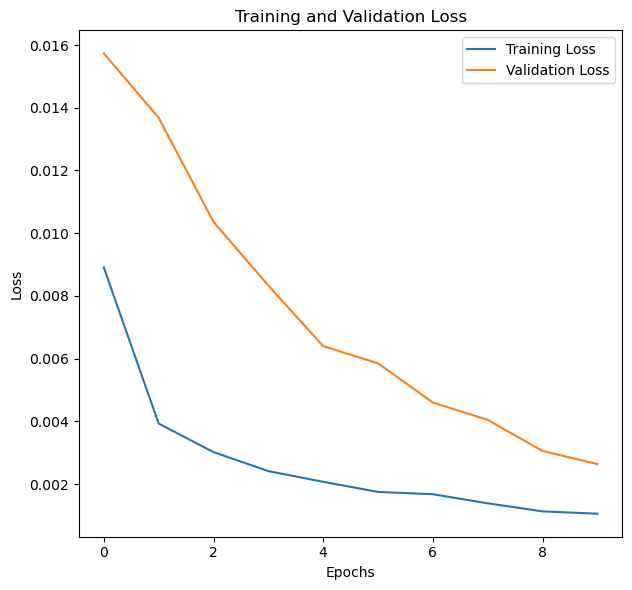

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Evaluate the model on the test set and print the test loss:

In [45]:
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3493e-04
Test Loss: 0.0011


In [46]:
print(df_test["Price"])

4933     7.020003e-06
274      8.100004e-07
4495     6.705003e-06
3721     6.030003e-06
3483     5.805003e-06
             ...     
12514    2.425501e-04
12536    2.749411e-04
12537    2.749411e-04
12551    3.586502e-04
12565    3.820502e-04
Name: Price, Length: 2647, dtype: float64


### LINEAR REGRESSION

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

# generates predictions for the target variable based on the test data
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.0011175967719460403


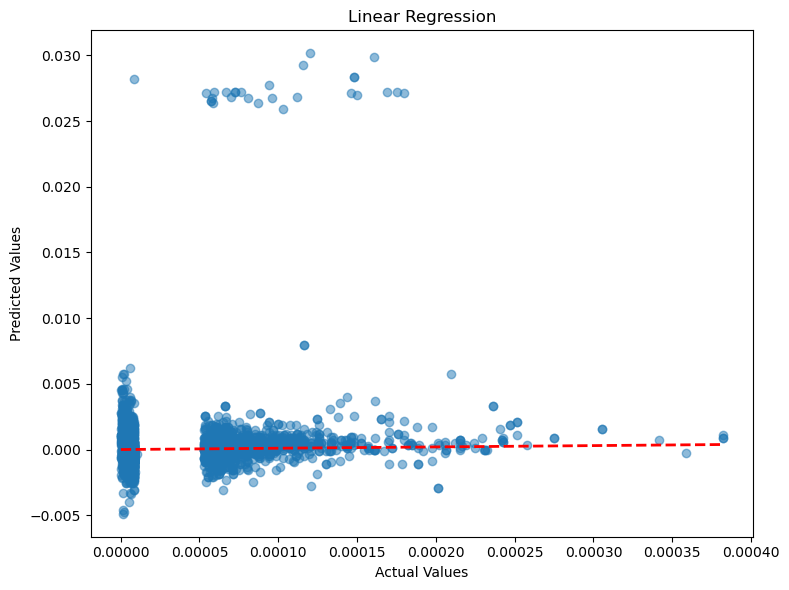

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()